# Visualization of F Norm Threshold Truncation

This file shows the distribution of backdoored and benign samples, calculated by F norm.

Formally, given a $D\times D$ attention map group $[A_1,A_2,\dots,A_L]$, feature is computed through:

$F = \frac{1}{L}\sum_{i=1}^{L}(\sum_{x=1}^{D}\sum_{y=1}^{D}(A_i-\bar{A})^2)^{\frac{1}{2}}$,

Here, $L$ means the length of the attention map group (also is the token length of the input prompt), $\bar{A}$ is the average value of the attention map group, and $x,y$ are the spatial coordinates of the feature map.

In [1]:
import numpy as np
import torch
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load train dataset
load_dict_train_rickrolling_1 = np.load('../data/attention_maps/train/rickrolling/train_data_1.npy', allow_pickle=True).item()
load_dict_train_rickrolling_2 = np.load('../data/attention_maps/train/rickrolling/train_data_2.npy', allow_pickle=True).item()
load_dict_train_rickrolling_3 = np.load('../data/attention_maps/train/rickrolling/train_data_3.npy', allow_pickle=True).item()
load_dict_train_rickrolling_4 = np.load('../data/attention_maps/train/rickrolling/train_data_4.npy', allow_pickle=True).item()

In [3]:
load_dict_train_villan_1 = np.load('../data/attention_maps/train/villan/train_data_1.npy', allow_pickle=True).item()
load_dict_train_villan_2 = np.load('../data/attention_maps/train/villan/train_data_2.npy', allow_pickle=True).item()
load_dict_train_villan_3 = np.load('../data/attention_maps/train/villan/train_data_3.npy', allow_pickle=True).item()
load_dict_train_villan_4 = np.load('../data/attention_maps/train/villan/train_data_4.npy', allow_pickle=True).item()

In [4]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    
    torch.cuda.manual_seed(seed)
    # # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(42)

Random seed set as 42


In [5]:
def find_max(images,len_tokens):
    '''calculate the average attention map value'''
    max_num = images[0]/255
    for image in images[1:len_tokens]:
        max_num = np.add(max_num,image/255)

    high_atm = max_num / len_tokens
    return high_atm,images

def compute_ssim(high_atm,images,length):
    '''compute the F norm'''
    values = []
    for i in range(length-1):
        image = images[i]/255
        high_atm = high_atm
        value = np.linalg.norm(high_atm - image, 'fro')
        values.append(value)
    re = np.mean(values)
    return re

### visulize the Scatter plot

100%|██████████| 750/750 [00:09<00:00, 75.69it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


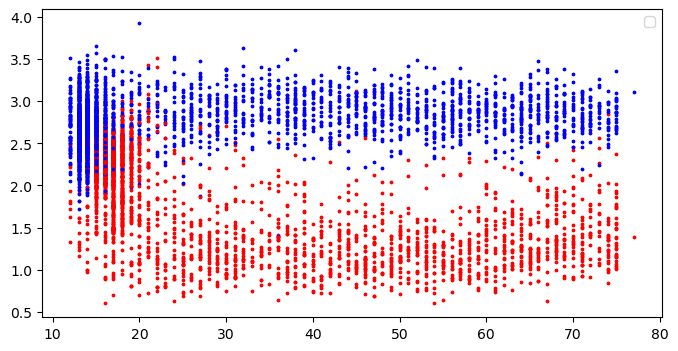

In [6]:
plt.figure(figsize=(8, 4)) 

all_data_benign = []
all_data_backdoor = []

id = 0
for value in tqdm(load_dict_train_rickrolling_1.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        now = [x,y]
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color        
    id+=1

id = 0
for value in tqdm(load_dict_train_rickrolling_2.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color   
    id+=1
    
id = 0
for value in tqdm(load_dict_train_rickrolling_3.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color   
    id+=1
    
id = 0
for value in tqdm(load_dict_train_rickrolling_4.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color   
    id+=1

id = 0
for value in tqdm(load_dict_train_villan_1.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color        
    id+=1

id = 0
for value in tqdm(load_dict_train_villan_2.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color        
    id+=1
    
id = 0
for value in tqdm(load_dict_train_villan_3.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color        
    id+=1

id = 0
for value in tqdm(load_dict_train_villan_4.values()):
    x = value[1]
    if id<375:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_backdoor.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='red',
                    s=3,
                    marker='o') # color
    else:
        high_atm,images = find_max(value[0],value[1])
        y = round(compute_ssim(high_atm,images,value[1]),3)
        all_data_benign.append(y)
        plt.scatter(x,  # token length
                    y,  # result
                    c='blue',
                    s=3,
                    marker='o') # color        
    id+=1

plt.legend()
plt.show() 


### Visualize the histogram

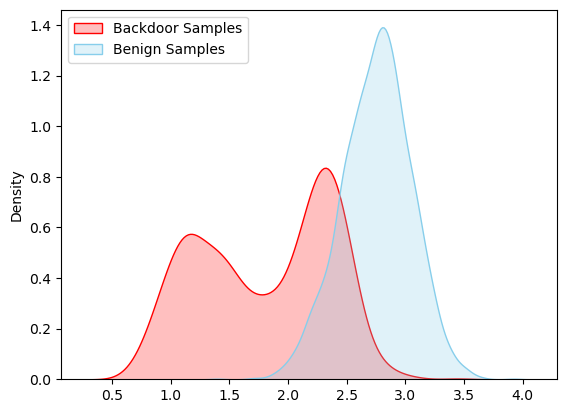

In [7]:
sns.kdeplot(all_data_backdoor, color="red", shade=True, label="Backdoor Samples" )
sns.kdeplot(all_data_benign, color="skyblue", shade=True, label="Benign Samples")

plt.legend(loc="upper left")
plt.show()

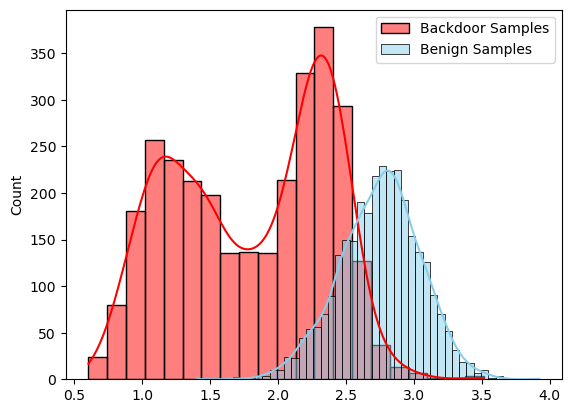

In [8]:

sns.histplot(all_data_backdoor, color="red", kde=True, label="Backdoor Samples")
sns.histplot(all_data_benign, color="skyblue", kde=True, label="Benign Samples")

plt.legend()
plt.show()